In [6]:
import numpy as np
from scipy import stats
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.metrics import mean_absolute_error, mean_squared_error
import seaborn as sns 
import matplotlib.pyplot as plt 
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import TimeSeriesSplit
from statsmodels.tools.eval_measures import rmse


In [7]:
data = pd.read_csv("C:\\Users\\harsh\\Downloads\\30_8AnnualConstructionCost.csv")
data

,Construction Cost Index,2022,2021,2020,2019,2018,2017,2016,2015,2014,...,1990,1989,1988,1987,1986,1985,1984,1983,1982,1981
0,Cost Index of Building Material,100.23,97.07,95.03,91.84,85.80,84.78,85.27,84.49,82.03,...,1065.03,895.47,757.98,696.90,623.17,560.22,531.33,485.99,462.94,359.01
1,Cost Index For Wages Of Labour,65.72,60.49,55.59,51.87,51.31,47.60,46.08,46.08,45.92,...,575.18,551.23,475.95,412.50,361.72,336.54,328.84,287.50,520.96,207.69
2,Building Construction Cost Index Number,165.95,157.56,165.62,143.77,137.11,132.38,131.35,130.57,127.95,...,929.40,797.94,679.89,618.15,550.78,498.28,475.41,431.02,404.24,317.10


In [10]:
from collections import Counter

data = [165.95, 157.56, 165.62, 143.77, 137.11, 132.38, 131.35, 130.57, 127.95, 117.89]

mean = np.mean(data)
median = np.median(data)

# Manually calculate the mode
data_count = Counter(data)
mode = data_count.most_common(1)[0][0]

variance = np.var(data)
std_dev = np.std(data)

print(f"Mean: {mean:.2f}")
print(f"Median: {median:.2f}")
print(f"Mode: {mode:.2f}")
print(f"Variance: {variance:.2f}")
print(f"Standard Deviation: {std_dev:.2f}")


Mean: 141.02
Median: 134.75
Mode: 165.95
Variance: 250.63
Standard Deviation: 15.83


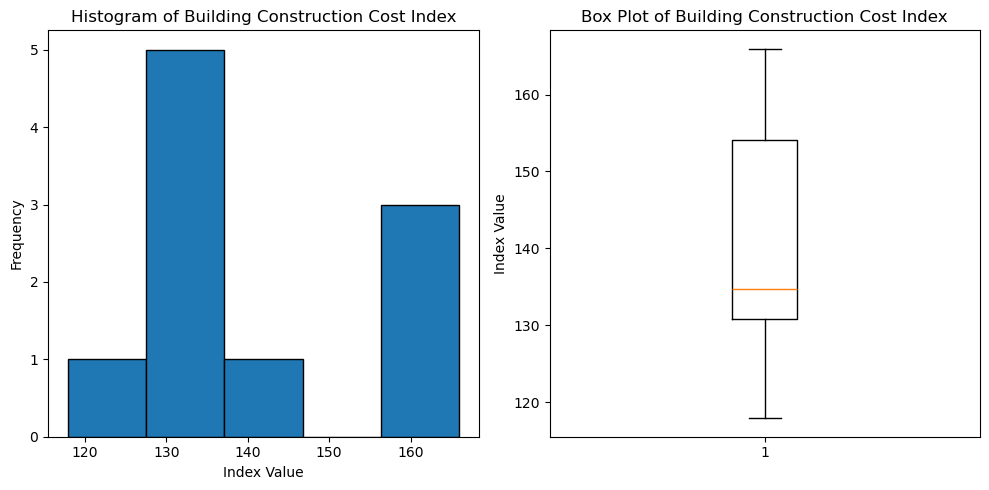

In [11]:
import matplotlib.pyplot as plt

# Histogram
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.hist(data, bins=5, edgecolor='black')
plt.title('Histogram of Building Construction Cost Index')
plt.xlabel('Index Value')
plt.ylabel('Frequency')

# Box plot
plt.subplot(1, 2, 2)
plt.boxplot(data)
plt.title('Box Plot of Building Construction Cost Index')
plt.ylabel('Index Value')

plt.tight_layout()
plt.show()

In [12]:
# Data
recent_years = [165.95, 157.56, 165.62, 143.77, 137.11]
earlier_years = [132.38, 131.35, 130.57, 127.95, 117.89]

# Perform independent t-test
t_statistic, p_value = stats.ttest_ind(recent_years, earlier_years)

print(f"T-statistic: {t_statistic:.4f}")
print(f"P-value: {p_value:.4f}")

T-statistic: 4.0573
P-value: 0.0036


In [18]:
import numpy as np
from scipy import stats

data = [165.95, 157.56, 165.62, 143.77, 137.11, 132.38, 131.35, 130.57, 127.95, 117.89]

# Calculate mean and standard error
mean = np.mean(data)
se = stats.sem(data)

# Calculate 95% confidence interval using the 'confidence' parameter
ci = stats.t.interval(confidence=0.95, df=len(data)-1, loc=mean, scale=se)

print(f"Sample Mean: {mean:.2f}")
print(f"95% Confidence Interval: ({ci[0]:.2f}, {ci[1]:.2f})")


Sample Mean: 141.02
95% Confidence Interval: (129.08, 152.95)


R-squared: 0.5568
Mean Squared Error: 3072834946.63
Root Mean Squared Error: 55433.16

Model Coefficients:
square_footage: 95.08
bedrooms: 24874.28
Intercept: 115139.11


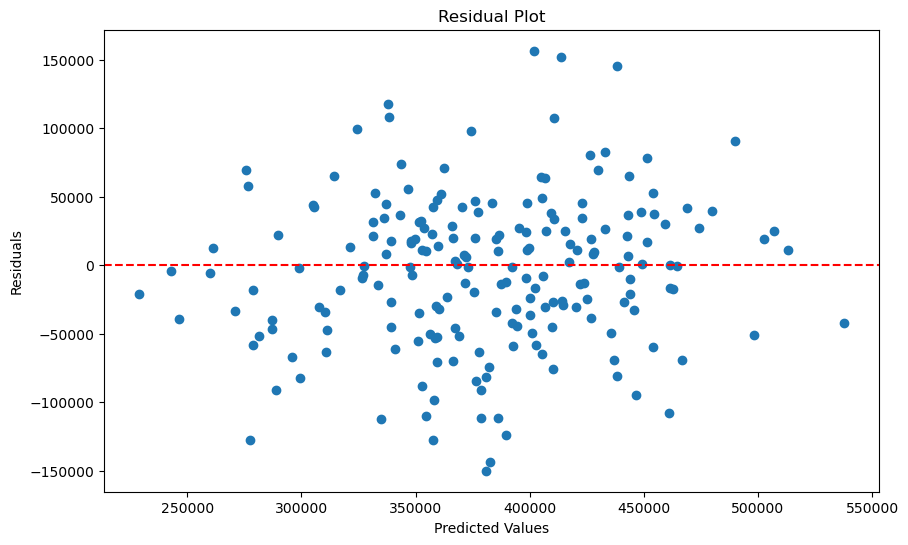

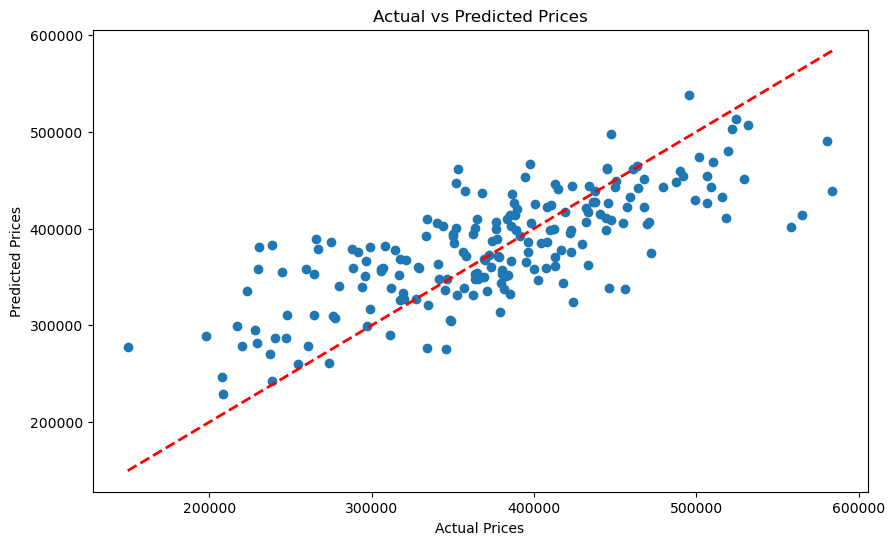

In [14]:
# Generate synthetic data
np.random.seed(42)
n_samples = 1000

square_footage = np.random.normal(2000, 500, n_samples)
bedrooms = np.random.randint(1, 6, n_samples)
noise = np.random.normal(0, 50000, n_samples)

price = 100000 + 100 * square_footage + 25000 * bedrooms + noise

# Create a DataFrame
df = pd.DataFrame({
    'square_footage': square_footage,
    'bedrooms': bedrooms,
    'price': price
})

# Split the data into training and testing sets
X = df[['square_footage', 'bedrooms']]
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"R-squared: {r2:.4f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {np.sqrt(mse):.2f}")

# Print coefficients and intercept
print("\nModel Coefficients:")
for feature, coef in zip(X.columns, model.coef_):
    print(f"{feature}: {coef:.2f}")
print(f"Intercept: {model.intercept_:.2f}")

# Plot residuals
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.show()

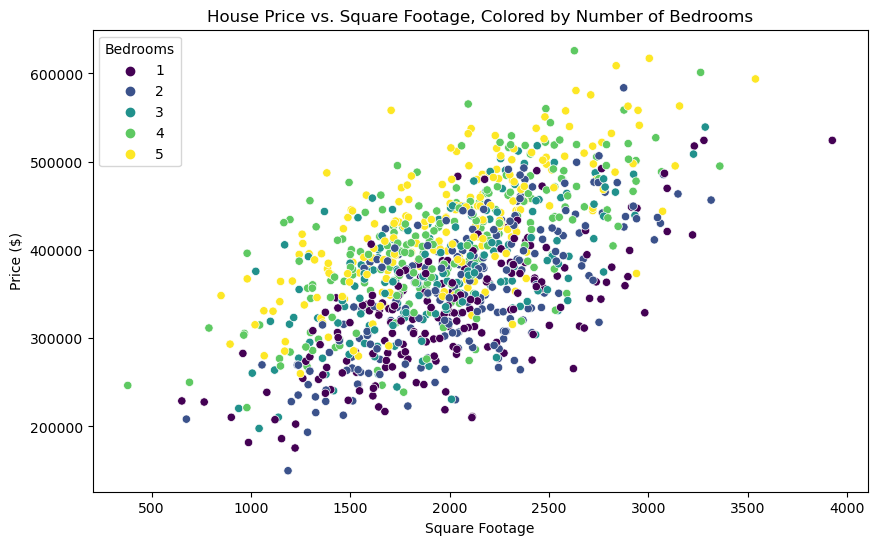

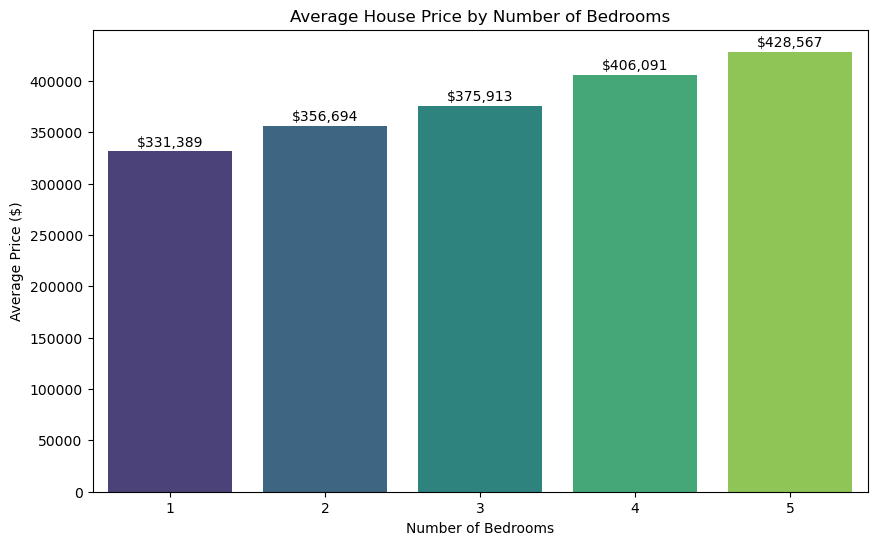

In [15]:
# Recreate the dataset
np.random.seed(42)
n_samples = 1000

square_footage = np.random.normal(2000, 500, n_samples)
bedrooms = np.random.randint(1, 6, n_samples)
noise = np.random.normal(0, 50000, n_samples)

price = 100000 + 100 * square_footage + 25000 * bedrooms + noise

df = pd.DataFrame({
    'square_footage': square_footage,
    'bedrooms': bedrooms,
    'price': price
})

# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='square_footage', y='price', hue='bedrooms', palette='viridis')
plt.title('House Price vs. Square Footage, Colored by Number of Bedrooms')
plt.xlabel('Square Footage')
plt.ylabel('Price ($)')
plt.legend(title='Bedrooms')
plt.show()

# Bar chart
plt.figure(figsize=(10, 6))
df_mean_price = df.groupby('bedrooms')['price'].mean().reset_index()
sns.barplot(data=df_mean_price, x='bedrooms', y='price', palette='viridis')
plt.title('Average House Price by Number of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Average Price ($)')
for i, v in enumerate(df_mean_price['price']):
    plt.text(i, v + 5000, f'${v:,.0f}', ha='center')
plt.show()

In [16]:
# Recreate the dataset
np.random.seed(42)
n_samples = 1000

square_footage = np.random.normal(2000, 500, n_samples)
bedrooms = np.random.randint(1, 6, n_samples)
noise = np.random.normal(0, 50000, n_samples)

price = 100000 + 100 * square_footage + 25000 * bedrooms + noise

df = pd.DataFrame({
    'square_footage': square_footage,
    'bedrooms': bedrooms,
    'price': price
})

# Split the data
X = df[['square_footage', 'bedrooms']]
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate MAE and RMSE
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Mean Absolute Error: ${mae:.2f}")
print(f"Root Mean Squared Error: ${rmse:.2f}")

Mean Absolute Error: $43559.03
Root Mean Squared Error: $55433.16


ARIMA(0, 0, 0) RMSE: 38112.731
ARIMA(0, 0, 1) RMSE: 37960.220
ARIMA(0, 0, 2) RMSE: 37921.577
ARIMA(0, 0, 3) RMSE: 37620.861
ARIMA(0, 1, 0) RMSE: 24138.707
ARIMA(0, 1, 1) RMSE: 24070.583
ARIMA(0, 1, 2) RMSE: 24518.657
ARIMA(0, 1, 3) RMSE: 24829.939
ARIMA(1, 0, 0) RMSE: 36383.813
ARIMA(1, 0, 1) RMSE: 35850.849
ARIMA(1, 0, 2) RMSE: 36520.286


C:\Users\harsh\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\harsh\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\harsh\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 3) RMSE: 36760.304
ARIMA(1, 1, 0) RMSE: 24065.710
ARIMA(1, 1, 1) RMSE: 24125.664


C:\Users\harsh\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\harsh\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 1, 2) RMSE: 24536.028
ARIMA(1, 1, 3) RMSE: 23388.562
ARIMA(2, 0, 0) RMSE: 35664.725


C:\Users\harsh\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\harsh\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\harsh\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\harsh\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(2, 0, 1) RMSE: 35699.011


C:\Users\harsh\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\harsh\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\harsh\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 0, 2) RMSE: 37015.052
ARIMA(2, 0, 3) RMSE: 36246.053
ARIMA(2, 1, 0) RMSE: 24498.025


C:\Users\harsh\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\harsh\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\harsh\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\harsh\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\harsh\anaconda3\Lib\s

ARIMA(2, 1, 1) RMSE: 24516.043


C:\Users\harsh\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\harsh\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(2, 1, 2) RMSE: 23145.235


C:\Users\harsh\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\harsh\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\harsh\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\harsh\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\harsh\anaconda3\Lib\s

ARIMA(2, 1, 3) RMSE: 23933.238
ARIMA(3, 0, 0) RMSE: 36500.459
ARIMA(3, 0, 1) RMSE: 37016.483


C:\Users\harsh\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\harsh\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\harsh\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\harsh\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\harsh\anaconda3\Lib\site-packages\statsmodels\tsa\states

ARIMA(3, 0, 2) RMSE: 35804.706


C:\Users\harsh\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\harsh\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\harsh\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\harsh\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\harsh\anaconda3\Lib\s

ARIMA(3, 0, 3) RMSE: 28985.785
ARIMA(3, 1, 0) RMSE: 24861.403
ARIMA(3, 1, 1) RMSE: 24720.131


C:\Users\harsh\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\harsh\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\harsh\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\harsh\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\harsh\anaconda3\Lib\s

ARIMA(3, 1, 2) RMSE: 23986.031


C:\Users\harsh\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\harsh\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\harsh\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\harsh\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\harsh\anaconda3\Lib\s

ARIMA(3, 1, 3) RMSE: 24159.326
Best ARIMA(2, 1, 2) RMSE: 23145.235


C:\Users\harsh\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\harsh\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\harsh\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


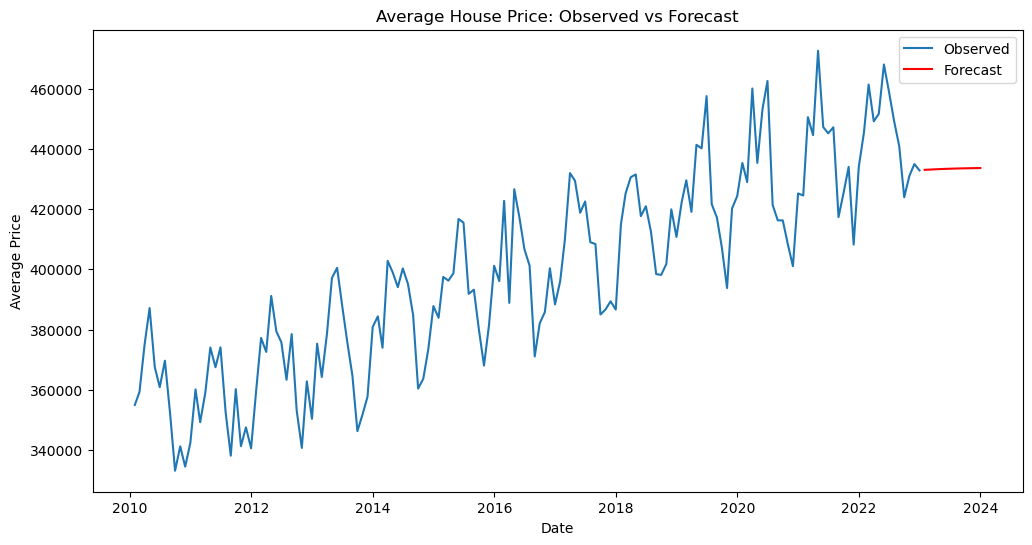

C:\Users\harsh\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\harsh\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


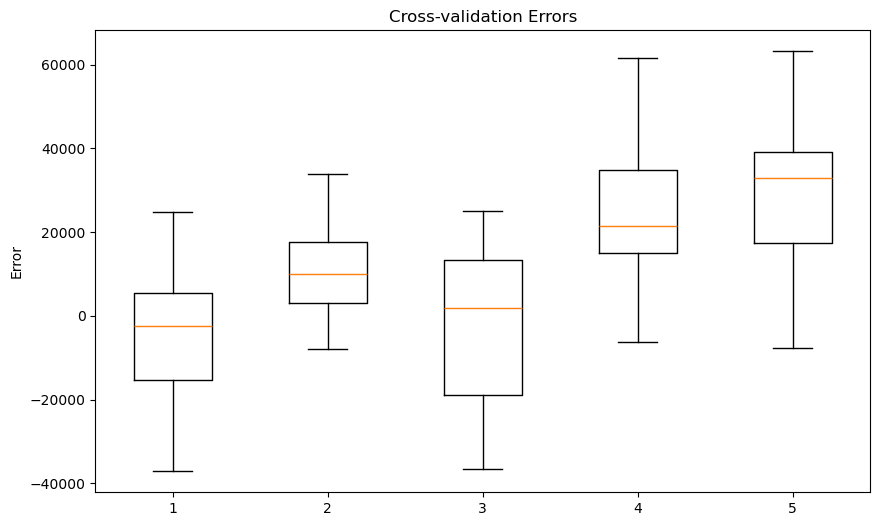

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import TimeSeriesSplit

# Generate synthetic time series data
np.random.seed(42)
date_rng = pd.date_range(start='1/1/2010', end='12/31/2022', freq='M')
n = len(date_rng)
trend = np.linspace(350000, 450000, n)  # Upward trend
seasonality = 20000 * np.sin(np.arange(n) * 2 * np.pi / 12)  # Yearly seasonality
noise = np.random.normal(0, 10000, n)
avg_prices = trend + seasonality + noise

ts_df = pd.DataFrame(data={'date': date_rng, 'avg_price': avg_prices})
ts_df.set_index('date', inplace=True)

# Function to evaluate ARIMA model using time series cross-validation
def evaluate_arima_model(X, arima_order):
    tscv = TimeSeriesSplit(n_splits=5)
    errors = []
    for train_index, test_index in tscv.split(X):
        train_data = X[train_index]
        test_data = X[test_index]
        model = ARIMA(train_data, order=arima_order)
        model_fit = model.fit()
        predictions = model_fit.forecast(steps=len(test_data))
        error = mean_squared_error(test_data, predictions, squared=False)  # RMSE
        errors.append(error)
    return np.mean(errors)

# Evaluate different ARIMA models
p_values = range(0, 4)
d_values = range(0, 2)
q_values = range(0, 4)

best_score, best_order = float("inf"), None
for p in p_values:
    for d in d_values:
        for q in q_values:
            order = (p, d, q)
            try:
                rmse = evaluate_arima_model(ts_df['avg_price'].values, order)
                if rmse < best_score:
                    best_score, best_order = rmse, order
                print(f'ARIMA{order} RMSE: {rmse:.3f}')
            except Exception as e:
                print(f'ARIMA{order} failed: {e}')
                continue

# Check if a valid model was found
if best_order is not None:
    print(f'Best ARIMA{best_order} RMSE: {best_score:.3f}')
    
    # Fit the best model
    model = ARIMA(ts_df['avg_price'], order=best_order)
    model_fit = model.fit()

    # Make predictions for the next 12 months
    forecast = model_fit.forecast(steps=12)

    # Plot the results
    plt.figure(figsize=(12, 6))
    plt.plot(ts_df.index, ts_df['avg_price'], label='Observed')
    plt.plot(pd.date_range(start=ts_df.index[-1], periods=13, freq='M')[1:], forecast, color='red', label='Forecast')
    plt.title('Average House Price: Observed vs Forecast')
    plt.xlabel('Date')
    plt.ylabel('Average Price')
    plt.legend()
    plt.show()

    # Box plot of cross-validation errors
    errors = []
    tscv = TimeSeriesSplit(n_splits=5)
    for train_index, test_index in tscv.split(ts_df):
        train_data = ts_df['avg_price'].values[train_index]
        test_data = ts_df['avg_price'].values[test_index]
        model = ARIMA(train_data, order=best_order)
        model_fit = model.fit()
        predictions = model_fit.forecast(steps=len(test_data))
        error = test_data - predictions
        errors.append(error)

    plt.figure(figsize=(10, 6))
    plt.boxplot(errors)
    plt.title('Cross-validation Errors')
    plt.ylabel('Error')
    plt.show()

else:
    print("No valid ARIMA model found. Consider adjusting your parameter search space or the data preprocessing.")
